# Read et Plot data.gouv.fr

**Petit script permettant de charger avec Panda la dernière version du fichier fournit sur [data.gouv.fr](data.gouv.fr) et production de quelques plots pour vérification.**

In [1]:
import pandas as pd

In [3]:
3+5

8

## Lecture des données

Les meta-données expliquant le sens à donner aux colonnes des données

In [2]:
url_meta="https://static.data.gouv.fr/resources/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/20200327-154414/metadonnees-donnees-hospitalieres-covid19.csv"
url_meta_stable="https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a"
covid_meta_orig=pd.read_csv(url_meta_stable, sep=';')
covid_meta_orig.head()

SyntaxError: invalid syntax (<ipython-input-2-4475e82d21b8>, line 4)

Lecture des données et sélectioner la colonne 'jour' comme index 

In [3]:
url="https://static.data.gouv.fr/resources/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/20200504-190020/donnees-hospitalieres-covid19-2020-05-04-19h00.csv"
url_stable="https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
covid_orig=pd.read_csv(url_stable, sep=';', parse_dates=[2])
covid_orig.set_index('jour', inplace=True)
covid_orig.head()

,dep,sexe,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,01,0,2,0,1,0
2020-03-18,01,1,1,0,1,0
2020-03-18,01,2,1,0,0,0
2020-03-18,02,0,41,10,18,11
2020-03-18,02,1,19,4,11,6


On ne sélectionne que les données correspondant à homme+femme (ie lignes telles que sexe==0). Puis on somme les données sur tous les départements pour avoir des résultats sur la france entière

In [4]:
covid = covid_orig.query(expr='sexe==0').drop(columns=['dep', 'sexe'])
covid1 = covid.groupby(covid.index)[['hosp', 'rea', 'rad', 'dc']].sum()
covid1.head()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,2972,771,816,218
2020-03-19,4073,1002,1180,327
2020-03-20,5226,1297,1587,450
2020-03-21,5900,1453,1811,525
2020-03-22,6954,1674,2117,632


Un dessin de courbe

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/MacBook_Derrode/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


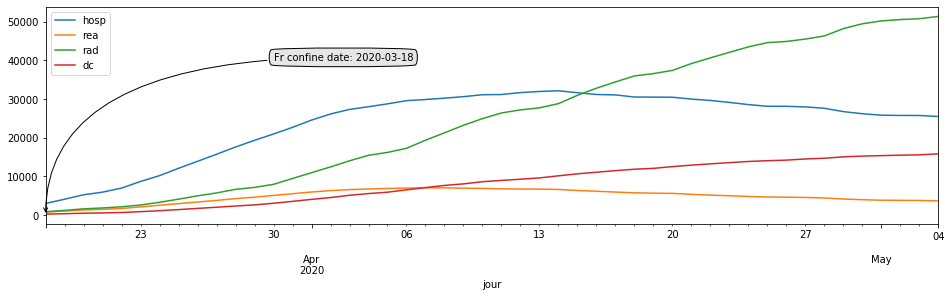

In [7]:

ax=covid1.plot(figsize=(16, 4))
#covid1.plot(subplots=True, figsize=(6, 6))
style = dict(size=12, color='magenta')
#ax.text('2020-03-17', 10000, "Confine date", **style)
ax.annotate('Fr confine date: 2020-03-18', xy=('2020-03-18', 1), xycoords='data', xytext=('2020-03-30', 40000), bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));
